In [1]:
import numpy as np
import pandas as pd

# Import và xử lý dữ liệu

In [2]:
data_set = pd.DataFrame(pd.read_csv(r'https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv'))

In [3]:
data_set

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


**Lấy ra những trường phục vụ cho việc dữ đoán**

In [4]:
data = data_set[['loan_status','Principal','terms','age','education','Gender']]

In [5]:
data

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,33,Bechalor,female
2,PAIDOFF,1000,15,27,college,male
3,PAIDOFF,1000,30,28,college,female
4,PAIDOFF,1000,30,29,college,male
...,...,...,...,...,...,...
341,COLLECTION,800,15,32,High School or Below,male
342,COLLECTION,1000,30,25,High School or Below,male
343,COLLECTION,800,15,39,college,male
344,COLLECTION,1000,30,28,college,male


**Labelencoder**

In [6]:
from sklearn import preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = preprocessing.LabelEncoder()

In [9]:
data['loan_status'] = LabelEncoder().fit_transform(data['loan_status'])
data['education'] = LabelEncoder().fit_transform(data['education'])
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11976/2603010172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['loan_status'] = LabelEncoder().fit_transform(data['loan_status'])
C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11976/2603010172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'] = LabelEncoder().fit_transform(data['education'])
C:\Users\MINHTR~1\AppData\Local\Temp/ipykernel_11976/2603010172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [10]:
data.head(10)

,loan_status,Principal,terms,age,education,Gender
0,1,1000,30,45,1,1
1,1,1000,30,33,0,0
2,1,1000,15,27,3,1
3,1,1000,30,28,3,0
4,1,1000,30,29,3,1
5,1,1000,30,36,3,1
6,1,1000,30,28,3,1
7,1,800,15,26,3,1
8,1,300,7,29,3,1
9,1,1000,15,39,1,1


**Kiểm tra dữ liệu Null**

In [11]:
data.isnull().sum()

loan_status    0
Principal      0
terms          0
age            0
education      0
Gender         0
dtype: int64

**Kiểm tra kiểu dữ liệu**

In [12]:
data.dtypes

loan_status    int32
Principal      int64
terms          int64
age            int64
education      int32
Gender         int32
dtype: object

**Tổng hợp số lượng PAIDOFF và COLLECTION**

In [13]:
PAIDOFF = len(data[data['loan_status'] == 1])
COLLECTION = len(data[data['loan_status']== 0])

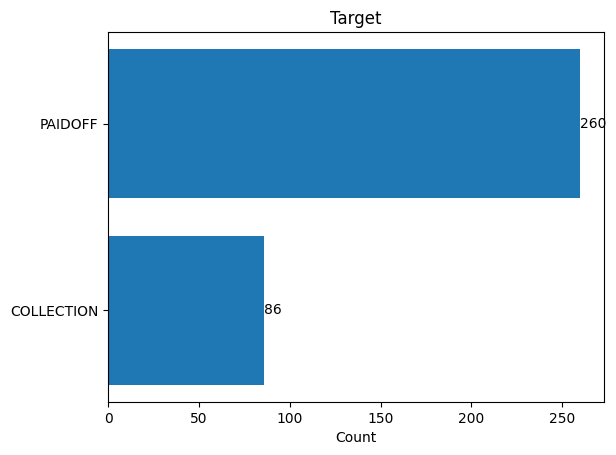

In [14]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('PAIDOFF', 'COLLECTION')
y_pos = np.arange(len(y))
x = (PAIDOFF, COLLECTION)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

**Hiệu chỉnh dữ liệu**

In [15]:
feature_cols = ['Principal','terms','age','education','Gender']

In [16]:
X = data[feature_cols]

In [17]:
X

,Principal,terms,age,education,Gender
0,1000,30,45,1,1
1,1000,30,33,0,0
2,1000,15,27,3,1
3,1000,30,28,3,0
4,1000,30,29,3,1
...,...,...,...,...,...
341,800,15,32,1,1
342,1000,30,25,1,1
343,800,15,39,3,1
344,1000,30,28,3,1


In [18]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

In [19]:
scaler

StandardScaler()

In [20]:
X_scaled = scaler.transform(X)

In [21]:
X_scaled

array([[ 0.51578458,  0.92071769,  2.33152555, -0.64691859,  0.42056004],
       [ 0.51578458,  0.92071769,  0.34170148, -1.5212695 , -2.37778177],
       [ 0.51578458, -0.95911111, -0.65321055,  1.10178323,  0.42056004],
       ...,
       [-1.31458942, -0.95911111,  1.33661351,  1.10178323,  0.42056004],
       [ 0.51578458,  0.92071769, -0.48739188,  1.10178323,  0.42056004],
       [ 0.51578458,  0.92071769, -0.81902922,  1.10178323,  0.42056004]])

In [22]:
y = data.loan_status

# Thiết lập mô hình dự đoán

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [25]:
lr = logreg.fit(X_train,y_train)

In [26]:
y_pred=logreg.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
lr.score(X_test, y_test)

0.8390804597701149

In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0, 14],
       [ 0, 73]], dtype=int64)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 427.9555555555555, 'Predicted label')

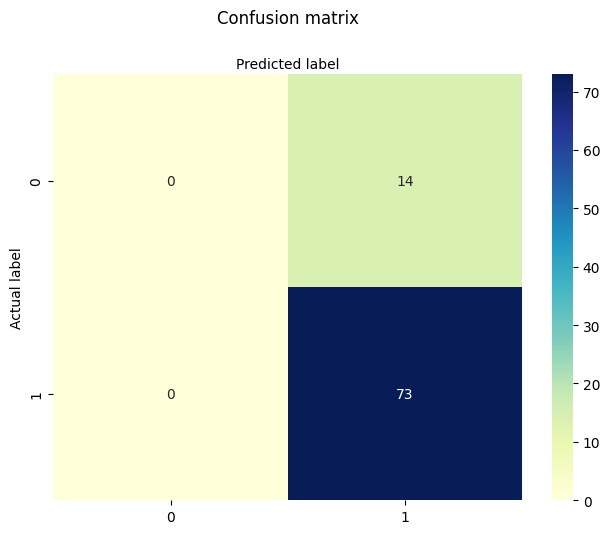

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Kết luân:**

Mô hình dự báo cho kết quả chính xác 83.9%